In [98]:
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
import pandas as pd

In [99]:
df=pd.read_csv('/kaggle/input/login-datathon-2024/Train.csv')
print(df.head())

   ENTITY_ID  CATEGORY_ID  ENTITY_LENGTH  \
0     216064          112     600.000000   
1    2498090         8360     984.251967   
2     210860           30     850.000000   
3     285757         6104     744.000000   
4    1869643         2201     600.000000   

                                  ENTITY_DESCRIPTION  
0                               Caricaturas (1892)    
1  VJ Interior Modern Solid Interio Cushioned Bar...  
2  Pam: Personalized Name Journal with Blank Line...  
3  Hio Nya Testamenti Drottins Vors Jesu Krists A...  
4  ADDIT Phone Case for Samsung Galaxy A50 [ Mili...  


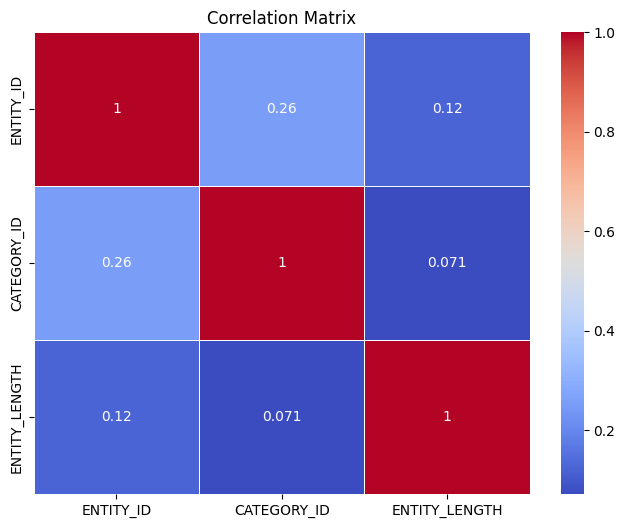

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns
# Correlation matrix
df_subset = df[['ENTITY_ID', 'CATEGORY_ID', 'ENTITY_LENGTH']]
correlation_matrix = df_subset.corr()

# Plotting the correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

<Axes: xlabel='CATEGORY_ID', ylabel='count'>

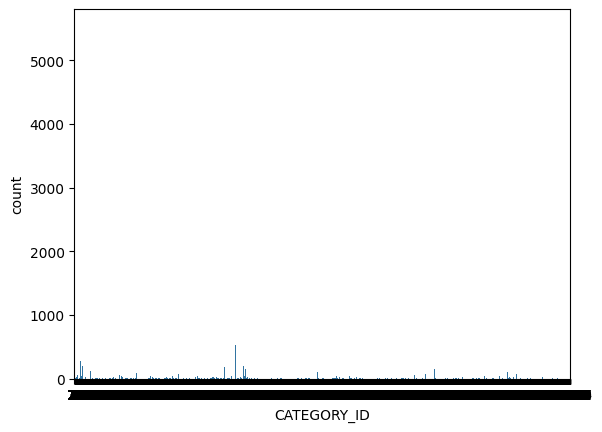

In [90]:
sns.countplot(x='CATEGORY_ID', data=df)
plt.show()

<Axes: xlabel='ENTITY_LENGTH'>

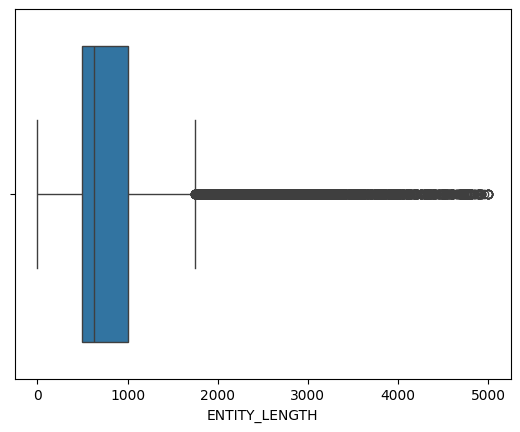

In [91]:
sns.boxplot(x='ENTITY_LENGTH', data=df)
plt.show()

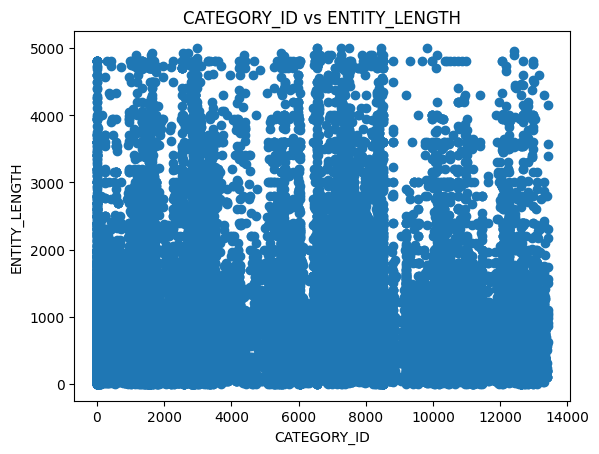

In [85]:
plt.scatter(df['CATEGORY_ID'], df['ENTITY_LENGTH'])
plt.xlabel('CATEGORY_ID')
plt.ylabel('ENTITY_LENGTH')
plt.title('CATEGORY_ID vs ENTITY_LENGTH')
plt.show()


count    100000.000000
mean        688.469590
std         804.985852
min           1.000000
25%          74.000000
50%         348.000000
75%        1066.000000
max        6871.000000
Name: description_length, dtype: float64


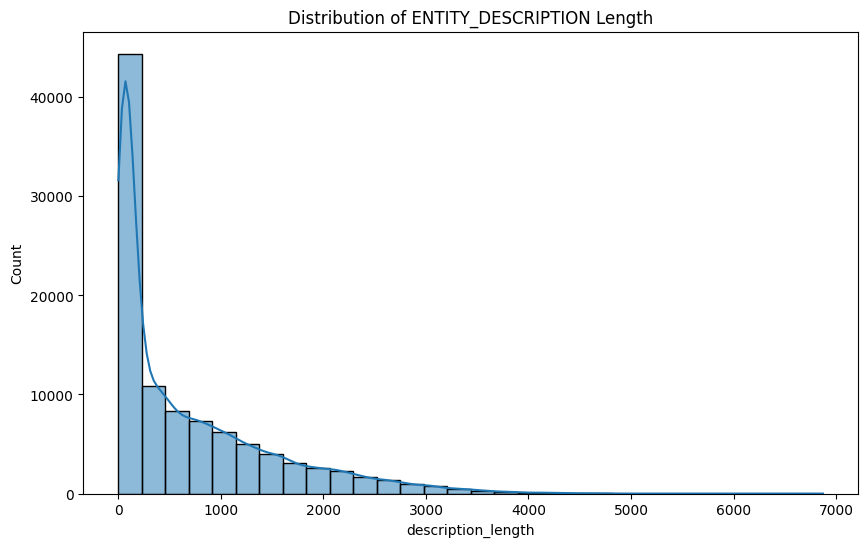

In [94]:
# Plotting distribution of description length
plt.figure(figsize=(10, 6))
sns.histplot(df['description_length'], bins=30, kde=True)
plt.title('Distribution of ENTITY_DESCRIPTION Length')
plt.show()

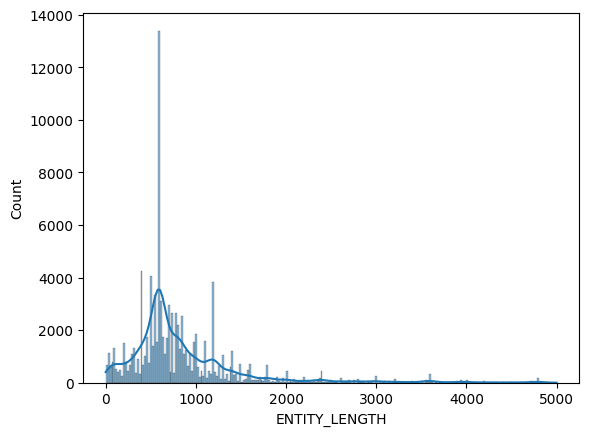

In [97]:
sns.histplot(s['ENTITY_LENGTH'],kde=True)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

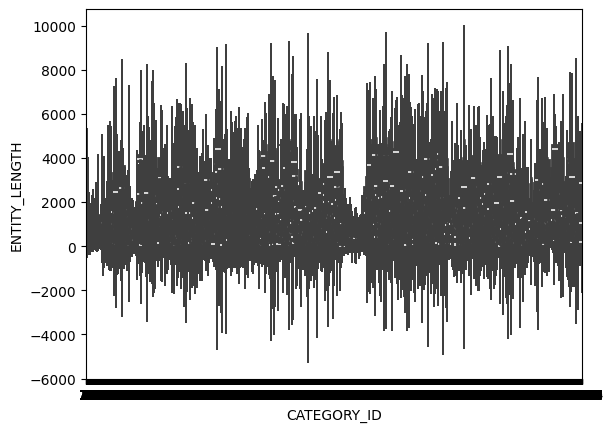

In [96]:
sns.violinplot(x='CATEGORY_ID', y ='ENTITY_LENGTH', data = df_subset)
plt.show

In [47]:
print(len(df.columns))

4


In [48]:
print(len(df.index))

100000


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ENTITY_ID           100000 non-null  int64  
 1   CATEGORY_ID         100000 non-null  int64  
 2   ENTITY_LENGTH       100000 non-null  float64
 3   ENTITY_DESCRIPTION  100000 non-null  object 
dtypes: float64(1), int64(2), object(1)
memory usage: 3.1+ MB


In [50]:
df.describe()

,ENTITY_ID,CATEGORY_ID,ENTITY_LENGTH
count,1.000000e+05,100000.000000,100000.000000
mean,1.481478e+06,3992.661350,846.074230
std,8.694148e+05,3969.245926,667.183486
min,2.200000e+01,0.000000,1.000000
25%,7.209542e+05,222.000000,500.000000
50%,1.470576e+06,2916.000000,629.921259
75%,2.233536e+06,6344.000000,1000.000000
max,2.999949e+06,13416.000000,4999.999995


In [95]:
# Length of ENTITY_DESCRIPTION
df['description_length'] =df['ENTITY_DESCRIPTION'].apply(lambda x: len(str(x)))
print(df['description_length'].describe())

count    100000.000000
mean        688.469590
std         804.985852
min           1.000000
25%          74.000000
50%         348.000000
75%        1066.000000
max        6871.000000
Name: description_length, dtype: float64


In [51]:
import string

# Define a simple list of common stopwords
basic_stopwords = set([
    'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 
    'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', 
    "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 
    'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 
    'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 
    'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 
    'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again',
    'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few',
    'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 
    's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 
    'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 
    'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn',
    "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 
    'wouldn', "wouldn't"
])

# Define a basic function for tokenization and stopword removal
def basic_preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Tokenize the text by splitting on whitespace
    tokens = text.split()
    
    # Remove stopwords
    filtered_tokens = [word for word in tokens if word not in basic_stopwords]
    
    return filtered_tokens

# Apply the basic preprocessing to the 'ENTITY_DESCRIPTION' column
df['processed_description'] = df['ENTITY_DESCRIPTION'].apply(basic_preprocess_text)

# Display the first few processed descriptions
print(df[['ENTITY_DESCRIPTION', 'processed_description']].head())


                                  ENTITY_DESCRIPTION  \
0                               Caricaturas (1892)     
1  VJ Interior Modern Solid Interio Cushioned Bar...   
2  Pam: Personalized Name Journal with Blank Line...   
3  Hio Nya Testamenti Drottins Vors Jesu Krists A...   
4  ADDIT Phone Case for Samsung Galaxy A50 [ Mili...   

                               processed_description  
0                                [caricaturas, 1892]  
1  [vj, interior, modern, solid, interio, cushion...  
2  [pam, personalized, name, journal, blank, line...  
3  [hio, nya, testamenti, drottins, vors, jesu, k...  
4  [addit, phone, case, samsung, galaxy, a50, mil...  


In [52]:
df.head()

,ENTITY_ID,CATEGORY_ID,ENTITY_LENGTH,ENTITY_DESCRIPTION,processed_description
0,216064,112,600.000000,Caricaturas (1892),"[caricaturas, 1892]"
1,2498090,8360,984.251967,VJ Interior Modern Solid Interio Cushioned Bar...,"[vj, interior, modern, solid, interio, cushion..."
2,210860,30,850.000000,Pam: Personalized Name Journal with Blank Line...,"[pam, personalized, name, journal, blank, line..."
3,285757,6104,744.000000,Hio Nya Testamenti Drottins Vors Jesu Krists A...,"[hio, nya, testamenti, drottins, vors, jesu, k..."
4,1869643,2201,600.000000,ADDIT Phone Case for Samsung Galaxy A50 [ Mili...,"[addit, phone, case, samsung, galaxy, a50, mil..."


In [53]:
df['processed_description_str'] = df['processed_description'].apply(lambda x: ' '.join(x)).str.translate(str.maketrans('', '', string.punctuation))

In [54]:
print(df.head)

<bound method NDFrame.head of        ENTITY_ID  CATEGORY_ID  ENTITY_LENGTH  \
0         216064          112     600.000000   
1        2498090         8360     984.251967   
2         210860           30     850.000000   
3         285757         6104     744.000000   
4        1869643         2201     600.000000   
...          ...          ...            ...   
99995     673840           69     614.014520   
99996    1390309        12762     921.258000   
99997    2038510        12064     708.661417   
99998     144510         6059     625.000000   
99999    2798106         6028    1102.362204   

                                      ENTITY_DESCRIPTION  \
0                                   Caricaturas (1892)     
1      VJ Interior Modern Solid Interio Cushioned Bar...   
2      Pam: Personalized Name Journal with Blank Line...   
3      Hio Nya Testamenti Drottins Vors Jesu Krists A...   
4      ADDIT Phone Case for Samsung Galaxy A50 [ Mili...   
...                              

In [56]:
s = df.drop(["ENTITY_DESCRIPTION", "processed_description"], axis=1, inplace=False)
s.head()


,ENTITY_ID,CATEGORY_ID,ENTITY_LENGTH,processed_description_str
0,216064,112,600.000000,caricaturas 1892
1,2498090,8360,984.251967,vj interior modern solid interio cushioned bar...
2,210860,30,850.000000,pam personalized name journal blank lined paper
3,285757,6104,744.000000,hio nya testamenti drottins vors jesu krists a...
4,1869643,2201,600.000000,addit phone case samsung galaxy a50 military g...


In [62]:
s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ENTITY_ID                  100000 non-null  int64  
 1   CATEGORY_ID                100000 non-null  int64  
 2   ENTITY_LENGTH              100000 non-null  float64
 3   processed_description_str  100000 non-null  object 
dtypes: float64(1), int64(2), object(1)
memory usage: 3.1+ MB


In [67]:
import nltk

# Ensure the required NLTK resources are downloaded correctly
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [74]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.data import find

nltk.download('punkt')
nltk.download('stopwords')

# Set NLTK data path explicitly, if required
nltk.data.path.append('/root/nltk_data')
nltk.data.path.append('/usr/local/nltk_data')
nltk.data.path.append('/usr/share/nltk_data')

# Test if punkt is accessible
try:
    word_tokenize("Test sentence.")
except LookupError:
    print("punkt resource is missing. Please check your installation.")




punkt resource is missing. Please check your installation.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Join the tokens back into a single string for each description
df['processed_description_str'] = df['processed_description'].apply(lambda x: ' '.join(x))

# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = tfidf_vectorizer = TfidfVectorizer(max_features=5000, min_df=2, max_df=0.95)


# Fit and transform the processed descriptions into TF-IDF vectors
tfidf_matrix = tfidf_vectorizer.fit_transform(df['processed_description_str'])

# Convert the TF-IDF matrix into a DataFrame for better readability (optional)
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Show the first few rows of the TF-IDF matrix
print(tfidf_df.head())


    01   02   03   05        06  075   08  080   10  100  ...  zari  zero  \
0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   
1  0.0  0.0  0.0  0.0  0.165017  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   
2  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   
3  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   
4  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   

   zinc  zip  zipper  zippered  zippers  zirconia  zone  zoom  
0   0.0  0.0     0.0       0.0      0.0       0.0   0.0   0.0  
1   0.0  0.0     0.0       0.0      0.0       0.0   0.0   0.0  
2   0.0  0.0     0.0       0.0      0.0       0.0   0.0   0.0  
3   0.0  0.0     0.0       0.0      0.0       0.0   0.0   0.0  
4   0.0  0.0     0.0       0.0      0.0       0.0   0.0   0.0  

[5 rows x 5000 columns]


In [15]:
print(tfidf_df.head(10))

    01   02   03   05        06  075   08  080   10       100  ...  zari  \
0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.000000  ...   0.0   
1  0.0  0.0  0.0  0.0  0.165017  0.0  0.0  0.0  0.0  0.000000  ...   0.0   
2  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.000000  ...   0.0   
3  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.000000  ...   0.0   
4  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.000000  ...   0.0   
5  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.187372  ...   0.0   
6  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.000000  ...   0.0   
7  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.000000  ...   0.0   
8  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.000000  ...   0.0   
9  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.000000  ...   0.0   

   zero  zinc  zip  zipper  zippered  zippers  zirconia  zone  zoom  
0   0.0   0.0  0.0     0.0       0.0      0.0       0.0   0.0   0.0  
1   0.0   0.0  0.0     